In [1]:
from oggm import utils
import geopandas as gpd
from oggm import cfg
from oggm import tasks, utils, workflow, graphics, DEFAULT_BASE_URL, global_task
import xarray as xr
import matplotlib.pyplot as plt
from oggm.global_tasks import compile_fixed_geometry_mass_balance
import pandas as pd


In [2]:
def initializa_gdir(glacier_name = 'RGI60-15.03473') :
    # Initialize OGGM and set up the default run parameters
    cfg.initialize(logging_level='WARNING')

    # Local working directory (where OGGM will write its output)
    # WORKING_DIR = utils.gettempdir('OGGM_distr4')
    cfg.PATHS['working_dir'] = utils.get_temp_dir('OGGM_distributed', reset=True)

    rgi_ids = [glacier_name]  # This is Aletsch
    gdir = workflow.init_glacier_directories(rgi_ids, prepro_base_url=DEFAULT_BASE_URL, from_prepro_level=4, prepro_border=80)[0]
    return gdir

2024-04-30 18:35:07: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-04-30 18:35:07: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-04-30 18:35:07: oggm.cfg: Multiprocessing: using all available processors (N=8)


2024-04-30 18:35:08: oggm.workflow: init_glacier_directories from prepro level 4 on 1 glaciers.
2024-04-30 18:35:08: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2024-04-30 18:35:11: oggm.utils: Applying global task compile_run_output on 1 glaciers
2024-04-30 18:35:11: oggm.utils: Applying compile_run_output on 1 gdirs.


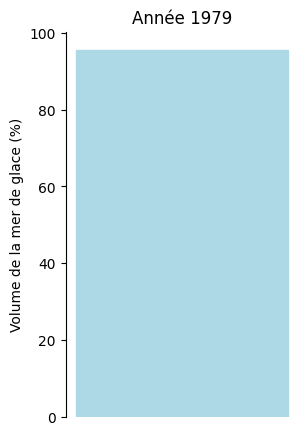

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import xarray as xr
import numpy as np

# Glacier directory avec la Mer de Glace  
gdir = initializa_gdir('RGI60-11.03643')
ds = utils.compile_run_output(gdir, input_filesuffix='_spinup_historical') # sert à récupérer les données de volume

# Calculer le pourcentage de volume de la mer de glace
max_volume = ds.volume.max()
volume_percentage = ds.volume / max_volume
years = ds.time.values
volume_percentage_values = volume_percentage.values
volume_percentage_values = volume_percentage_values * 100
years = [int(year) for year in years]


# Créer la figure
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)

# On crée la première barre
bar_container = ax.bar(0, height=volume_percentage_values[0][0], width=1, bottom=0)
bar = [bar_container[0]]
bar[0].set_color('lightblue')

# On met à jour la figure avec les données des années suivantes
def update(frame):
    if 0 <= frame < len(volume_percentage_values):
        # Mettre à jour la hauteur de la barre
        height = volume_percentage_values[frame][0]
        bar[0].set_height(height)
        ax.set_title(f"Année {years[frame]}")
        ax.set_ylabel("Volume de la mer de glace (%)")
        return bar

# On crée l'animation
ani = animation.FuncAnimation(fig, update, frames=len(volume_percentage_values))

# On enlève les axes inutiles pour faire propre
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(False)

HTML(ani.to_jshtml())


2024-04-30 18:35:14: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-04-30 18:35:14: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-04-30 18:35:14: oggm.cfg: Multiprocessing: using all available processors (N=8)


2024-04-30 18:35:14: oggm.workflow: init_glacier_directories from prepro level 4 on 1 glaciers.
2024-04-30 18:35:14: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2024-04-30 18:35:15: oggm.utils: Applying global task compile_run_output on 1 glaciers
2024-04-30 18:35:15: oggm.utils: Applying compile_run_output on 1 gdirs.


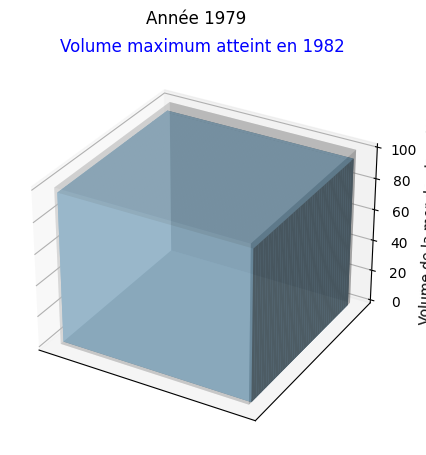

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import xarray as xr
import numpy as np

# Glacier directory avec la Mer de Glace  
gdir = initializa_gdir('RGI60-11.03643')
ds = utils.compile_run_output(gdir, input_filesuffix='_spinup_historical') # sert à récupérer les données de volume

# Calculer le pourcentage de volume de la mer de glace
max_volume = ds.volume.max()
volume_percentage = ds.volume / max_volume
years = ds.time.values
volume_percentage_values = volume_percentage.values
volume_percentage_values = volume_percentage_values * 100
years = [int(year) for year in years]

# Créer la figure
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Histogramme évolutif")
ax.set_ylabel("Années")
ax.set_zlabel("Volume de la mer de glace (%)")
ax.set_zlim(0, 100)  # Fixer les limites de l'axe z à 0 et 100

# Position x des barres
xpos = np.zeros(len(volume_percentage_values))
# Position y des barres (années)
ypos = np.arange(len(volume_percentage_values))
# Hauteur initiale des barres (première année)
height = np.squeeze(volume_percentage_values[0])

bars = ax.bar3d(xpos, ypos, np.zeros(len(volume_percentage_values)), 1, 1, height, color='lightblue')

# Barre de référence (100%)
reference_bar = ax.bar3d(0, -1, 0, 1, len(volume_percentage_values)+2, 100, color='orange', alpha=0.3)

max_text = None

max_year = None

def update(frame):
    global max_year
    ax.clear()
    # Mettre à jour la hauteur des barres
    height = np.squeeze(volume_percentage_values[frame])
    bars = ax.bar3d(xpos, ypos, np.zeros(len(volume_percentage_values)), 1, 1, height, color='lightskyblue', zsort='max')
    ax.set_zlabel("Volume de la mer de glace (%)")
    ax.set_xticks([])  # Supprimer l'axe x
    ax.set_yticks([])  # Supprimer l'axe y
    ax.set_zlim(0, 100)  # Fixer les limites de l'axe z à 0 et 100

    # Ajout de la barre de référence à chaque frame
    reference_bar = ax.bar3d(0, -1, 0, 1, len(volume_percentage_values)+2, 100, color='lightgray', alpha=0.3, zsort='min')

    # Si la hauteur atteint 100%, enregistrer l'année
    if height >= 100 and max_year is None:
        max_year = years[frame]

    # Afficher le titre et le sous-titre quand il y a besoin
    plt.suptitle(f"Année {years[frame]}")
    if max_year is not None:
        ax.set_title(f"Volume maximum atteint en {max_year}", color='blue')


# Création de l'animation
ani = animation.FuncAnimation(fig, update, frames=len(volume_percentage_values), interval=100)

# Affichage de l'animation
HTML(ani.to_jshtml())


## TODO : essayer d'avoir les volumes des glaciers prédits par les évolutions du giec
cf : https://github.com/OGGM/oggm-standard-projections-csv-files/blob/main/notebooks/compare_oggm_1.6.1_to_rounce_et_al_2023.ipynb 